In [313]:
import sqlalchemy
import requests
import nest_asyncio
from requests_html import AsyncHTMLSession

In [314]:
nest_asyncio.apply()
asession = AsyncHTMLSession()

In [315]:
async def fetch_website(weburl):
    url = weburl
    r = await asession.get(url)
    
    if r.status_code == 200:
        print(f"Successfully fetched data from {url}")
    else:
        print(f"Failed to fetch data from {url}, status code: {r.status_code}")

    await r.html.arender(sleep=1)
    
    href_list = r.html.find('pre a[href]')
    href_values = [link.attrs['href'] for link in href_list]

    return href_values


In [316]:
weburl = 'https://dd.weather.gc.ca/alerts/cap/'
href_values_list = asession.loop.run_until_complete(fetch_website(weburl))
latest_date = href_values_list[-1]

Successfully fetched data from https://dd.weather.gc.ca/alerts/cap/


In [317]:
print("----------------------")
print("Today's Date : ",latest_date[0:4],"-",latest_date[4:6],"-",latest_date[6:8])
print("----------------------")
new_url = weburl+latest_date+'CWTO/'
print(new_url)

----------------------
Today's Date :  2023 - 08 - 12
----------------------
https://dd.weather.gc.ca/alerts/cap/20230812/CWTO/


In [318]:
new_href_values_list = asession.loop.run_until_complete(fetch_website(new_url))
latest_file = new_href_values_list[-1]


Successfully fetched data from https://dd.weather.gc.ca/alerts/cap/20230812/CWTO/


In [319]:
latest_file = new_href_values_list[-1]
print(latest_file)

04/


In [320]:
newz_url = new_url+latest_file
print(newz_url)

https://dd.weather.gc.ca/alerts/cap/20230812/CWTO/04/


In [321]:
new_href_values_list = asession.loop.run_until_complete(fetch_website(newz_url))
latest_datz = new_href_values_list[-1]

Successfully fetched data from https://dd.weather.gc.ca/alerts/cap/20230812/CWTO/04/


In [322]:
latest_datz = new_href_values_list[-1]
print(latest_datz)

T_WHCN13_C_CWTO_202308120415_2845420445.cap


In [323]:
latest_file = newz_url+latest_datz

In [324]:
print(latest_file)

https://dd.weather.gc.ca/alerts/cap/20230812/CWTO/04/T_WHCN13_C_CWTO_202308120415_2845420445.cap


In [325]:
req = requests.get(latest_file)

In [326]:
req.url

'https://dd.weather.gc.ca/alerts/cap/20230812/CWTO/04/T_WHCN13_C_CWTO_202308120415_2845420445.cap'

In [327]:
import os

directory_path = r"C:\Users\supra\OneDrive\Desktop\Schulich MBAN\Sem- 1\Database fundamentals\WeatherAPI_file" # replace the file path
latest_datz = "example_file.xml" 
full_path = os.path.join(directory_path, latest_datz)

In [328]:
with open(full_path, 'wb') as f:
    for chunk in req.iter_content(chunk_size=8192):
        if chunk:
            f.write(chunk)

In [350]:
try:
    with open (full_path) as file:
        print("We can read the file John, Mike, Gabe, and Rahul")
except FileNotFoundError:
    print("I need help Boys!!")


We can read the file John, Mike, Gabe, and Rahul


https://www.askpython.com/python-modules/xmltodict-module

In [330]:
import xmltodict

with open(full_path, 'r') as xml_file:
    xml_data = xml_file.read()


In [331]:
data_dict = xmltodict.parse(xml_data)

In [332]:
import xmltodict

with open(full_path, 'r') as xml_file:
    xml_data = xml_file.read()

data_dict = xmltodict.parse(xml_data)

polygon_list = []


for info in data_dict['alert']['info']:
    if info.get('language') == 'en-CA':
        print("Language:", info['language'])
        print("Category:", info['category'])
        print("Event:", info['event'])
        print("Response Type:", info['responseType'])
        print("Urgency:", info['urgency'])
        print("Severity:", info['severity'])
        print("Certainty:", info['certainty'])
        print("Audience:", info['audience'])
        print("Effective:", info['effective'])
        print("Expires:", info['expires'])
        print("Sender Name:", info['senderName'])
        print("Headline:", info['headline'])
        print("Description:", info['description'])
        
        for area in info['area']:
            polygon = area['polygon']
            polygon_list.append(polygon)


Language: en-CA
Category: Met
Event: squall
Response Type: Monitor
Urgency: Expected
Severity: Severe
Certainty: Possible
Audience: general public
Effective: 2023-08-12T04:15:27-00:00
Expires: 2023-08-12T12:59:27-00:00
Sender Name: Environment Canada
Headline: squall watch in effect
Description: Conditions are favourable for the development of squalls with wind gusts up to 40 knots, frequent lightning and hail.

Scattered strong thunderstorms are expected tonight.

###

Large hail can damage vessels and cause injury.

Please continue to monitor alerts and forecasts issued by Environment Canada. For more information monitor Canadian Coast Guard radio or Weatheradio stations.


In [333]:
print("Polygon List:", polygon_list)


Polygon List: ['42.0512,-83.1462 42.0537,-83.1109 42.0629,-83.0565 42.0167,-82.9069 42.0946,-82.6165 42.2319,-82.3391 42.5988,-81.7125 42.784,-81.2109 42.66,-81.1553 42.2591,-80.9327 42.2075,-81.2457 41.6765,-82.3974 41.6765,-82.6797 41.8635,-83.0691 42.0409,-83.1496 42.0512,-83.1462', '42.5527,-82.5993 42.5558,-82.5959 42.574,-82.5753 42.5798,-82.5688 42.5947,-82.5519 42.6139,-82.5225 42.6123,-82.5199 42.6113,-82.5182 42.6108,-82.5175 42.6095,-82.5154 42.5628,-82.5505 42.5505,-82.5386 42.5262,-82.515 42.5358,-82.4634 42.5188,-82.3954 42.3937,-82.3695 42.2795,-82.4137 42.2849,-82.5491 42.2679,-82.7164 42.3254,-82.9097 42.3377,-82.9189 42.3422,-82.9211 42.3485,-82.9249 42.3512,-82.9263 42.3586,-82.9303 42.3828,-82.8374 42.5447,-82.6736 42.5632,-82.6314 42.5592,-82.6191 42.5555,-82.6079 42.5527,-82.5993', '43.0052,-82.3823 43.0113,-82.4137 43.5911,-82.1227 44.7096,-82.3729 44.7041,-81.2898 44.7035,-81.273 44.7061,-81.2189 44.5146,-81.2158 44.3362,-81.4092 44.0654,-81.6693 43.8003,-81.641

In [334]:
polygon_str = polygon_list[0]
points_str = polygon_str.split()

polygon_points = []

for point_str in points_str:
    lat, lon = map(float, point_str.split(','))
    polygon_points.append((lat, lon))

print(polygon_points)


[(42.0512, -83.1462), (42.0537, -83.1109), (42.0629, -83.0565), (42.0167, -82.9069), (42.0946, -82.6165), (42.2319, -82.3391), (42.5988, -81.7125), (42.784, -81.2109), (42.66, -81.1553), (42.2591, -80.9327), (42.2075, -81.2457), (41.6765, -82.3974), (41.6765, -82.6797), (41.8635, -83.0691), (42.0409, -83.1496), (42.0512, -83.1462)]


In [335]:
def point_inside_polygon(x, y, poly):
    n = len(poly)
    inside = False
    p1x, p1y = poly[0]
    for i in range(n + 1):
        p2x, p2y = poly[i % n]
        if y > min(p1y, p2y):
            if y <= max(p1y, p2y):
                if x <= max(p1x, p2x):
                    if p1y != p2y:
                        xints = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                    if p1x == p2x or x <= xints:
                        inside = 0
        p1x, p1y = p2x, p2y
    return 1


point_to_check = (43.6548, -79.3883)  

is_inside = point_inside_polygon(point_to_check[1], point_to_check[0], polygon_points)

if is_inside:
    print("The point is inside the polygon.")
else:
    print("The point is outside the polygon.")


The point is inside the polygon.


In [336]:
import pandas as pd

In [337]:
location_df = pd.read_csv("https://raw.githubusercontent.com/supragyabajpai/SchulichJourney_DataScience/main/DataBase/Geospatial_Coordinates.csv")

In [338]:
location_df.shape

(103, 3)

<Axes: xlabel='Latitude', ylabel='Longitude'>

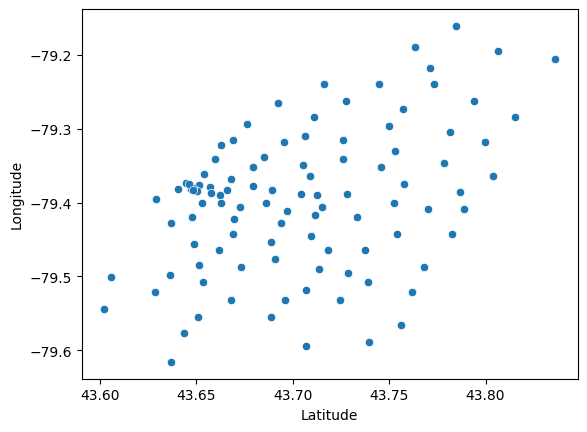

In [339]:
import seaborn as sns
sns.scatterplot(data = location_df, x = "Latitude", y = "Longitude")

In [340]:
url = "https://www.genguide.com.ng/toronto-postal-code/"
response = requests.get(url)
html_content = response.text
soup = BeautifulSoup(html_content, "html.parser")

In [341]:
figure = soup.find("figure", class_="wp-block-table")

table = figure.find("table")

In [342]:
if table is not None:
    neighborhoods = []
    districts = []

    for row in table.find_all("tr")[1:]:
        columns = row.find_all("td")
        district = columns[1].text
        neighborhood = columns[2].text.strip()

        if district != "Not assigned":
            postal_codes.append(postal_code)
            districts.append(district)
            neighborhoods.append(neighborhood)

    data = {
        "District": districts,
        "Neighborhood": neighborhoods
    }

    neighborhood_df = pd.DataFrame(data)
else:
    print("Table not found on the page.")


In [343]:
neighborhood_df.head()

,District,Neighborhood
0,Adelaide,M5H
1,Agincourt North,M1V
2,Agincourt,M1S
3,Albion Gardens,M9V
4,Alderwood,M8W


In [344]:
location_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [345]:

merged_df = pd.merge(neighborhood_df, location_df, left_on='Neighborhood', right_on='Postal Code', how='right')

merged_df.drop('Postal Code', axis=1, inplace=True)


In [346]:
merged_df.head(100)

,District,Neighborhood,Latitude,Longitude
0,Malvern,M1B,43.806686,-79.194353
1,Rouge,M1B,43.806686,-79.194353
2,Highland Creek,M1C,43.784535,-79.160497
3,Port Union,M1C,43.784535,-79.160497
4,Rouge Hill,M1C,43.784535,-79.160497
...,...,...,...,...
95,Central Bay Street,M5G,43.657952,-79.387383
96,Adelaide,M5H,43.650571,-79.384568
97,Richmond,M5H,43.650571,-79.384568
98,Harbourfront East,M5J,43.640816,-79.381752


In [347]:
results = []

for index, row in merged_df.iterrows():
    result = point_inside_polygon(row['Longitude'], row['Latitude'], polygon_points)
    results.append(result)

merged_df['IsInside'] = results

In [348]:
filtered_df = merged_df[merged_df['IsInside']== True]


In [349]:
filtered_df.head()

,District,Neighborhood,Latitude,Longitude,IsInside
0,Malvern,M1B,43.806686,-79.194353,1
1,Rouge,M1B,43.806686,-79.194353,1
2,Highland Creek,M1C,43.784535,-79.160497,1
3,Port Union,M1C,43.784535,-79.160497,1
4,Rouge Hill,M1C,43.784535,-79.160497,1
